In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Считаываем данные о действиях, которые совершают студенты со стэпами

они хранятся здесь если что: https://stepik.org/media/attachments/course/4852/event_data_train.zip

1) step_id - id стэпа
2) user_id - анонимизированный id юзера
3) timestamp - время наступления события в формате unix date
4) action - событие, возможные значения: 
- discovered - пользователь перешел на стэп
- viewed - просмотр шага,
- started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
- passed - удачное решение практического шага

In [10]:
events_data= pd.read_csv('/Users/tony_builder/tony. Личное/IT/Mashine Learning/event_data_train.csv')
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


Считываем данные  о времени и статусах сабмитов к практическим заданиям

они хранятся здесь если что: https://stepik.org/media/attachments/course/4852/submissions_data_train.zip

1) step_id - id стэпа
2) timestamp - время отправки решения в формате unix date
3) submission_status - статус решения
4) user_id - анонимизированный id юзера


In [7]:
submission_data = pd.read_csv('/Users/tony_builder/tony. Личное/IT/Mashine Learning/submissions_data_train.csv')

submission_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


### формат времени - это количество секунд, которые прошли с 1 января 1970 года

полезные ссылки:
1) работа со временем в pandas https://medium.datadriveninvestor.com/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d
2) примеры работы со временем в pandas: https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
3) работа с модулем datetime https://python-scripts.com/datetime-time-python

отвлечемся - немного поработаем со временем на примерах

In [33]:
# узнать текущую дату - код выведет кортеж (год, месяц, день, час, минут, секунд...)
import datetime                 # нужно импортировать модуль datetime
now = datetime.datetime.now()
display(now)
print(now)

# но объект не итерируемый! код ниже выдаст ошибку
# print(tuple(now)[0]) 

# а значит нужно пользоваться встроенными методами:
print(now.year, now.month, now.day, now.hour, now.minute, now.second)   # выведет значение типа int, с которым уже можно работать



datetime.datetime(2023, 2, 17, 12, 7, 53, 134298)

2023-02-17 12:07:53.134298
2023 2 17 12 7 53
2028


pandas.Series.dt.year возвращает год даты и времени. 

pandas.Series.dt.month возвращает месяц даты и времени. 

pandas.Series.dt.day возвращает день даты и времени. 

pandas.Series.dt.hour возвращает час даты и времени. 

pandas.Series.dt.minute возвращает минуту даты и времени.

In [40]:
# разбить дату на отдельные элементы можно так:

rng = pd.DataFrame()
rng['date'] = pd.date_range('1/1/2011', periods = 72, freq ='H')
 
# Print the dates in dd-mm-yy format
rng[:5]

# заодно напомню себе, как можно легко экранировать исключить убрать целый блок кода из выполнения 
"""
# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute  
"""
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute  

rng

,date,year,month,day,hour,minute
0,2011-01-01 00:00:00,2011,1,1,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0
2,2011-01-01 02:00:00,2011,1,1,2,0
3,2011-01-01 03:00:00,2011,1,1,3,0
4,2011-01-01 04:00:00,2011,1,1,4,0
...,...,...,...,...,...,...
67,2011-01-03 19:00:00,2011,1,3,19,0
68,2011-01-03 20:00:00,2011,1,3,20,0
69,2011-01-03 21:00:00,2011,1,3,21,0
70,2011-01-03 22:00:00,2011,1,3,22,0


добавим колонку с переведенным временем в привычный формат

формат (тип) этих данных - datetime64[ns]

In [14]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data.head()



,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [15]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

можно работать с этими данными о времени

например, найти минимальное (то есть по сути время первого обращения к курсу): 

In [16]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

посмотрим какие уникальные данные вообще встречаются в графе событий:

In [11]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

создадим новую колонку 

In [41]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


Теперь посмотрим сколько людей в какой день записалось

для этого сгруппируем по колонке день, и возьмем число уникальных юзеров из колонки user_id

In [42]:
events_data.groupby('day') \
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

неудобно данные в таком виде оценитьва6 строим график

где х - это переменная столбца День (дата)

у - это значение уникальных пользователей 

<AxesSubplot: xlabel='day'>

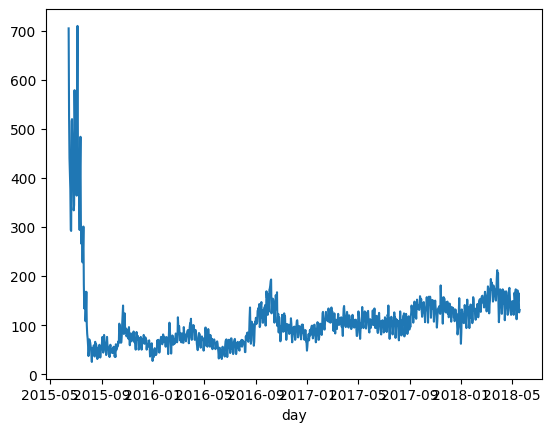

In [43]:
events_data.groupby('day') \
    .user_id.nunique().plot()

настроим размер графика для удобства восприятия

In [44]:
# Надстройка для изменения размера графика
sns.set(rc={'figure.figsize': (9,6)}) 

<AxesSubplot: xlabel='day'>

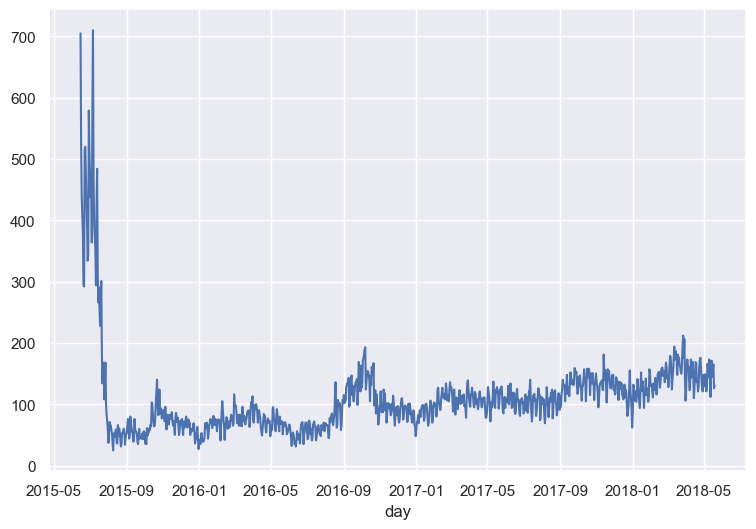

In [45]:
events_data.groupby('day') \
    .user_id.nunique().plot()

Теперь посмотрим кто успешно решал степы и в каком количестве

для этого:
- отфильтруем датасэт по показателю passed в графе action
- сгруппируем датасэт по переменной пользователя (чтобы он посчитал всех уникальных пользователей)
- аггрегируем данные по графе step_id (в данном случае посчитаем количество пройденных степов)
- заменим имя колонки, в которую мы все это собираем (step_id -> passed_step)


In [52]:

events_passed = events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_step'})

events_passed

,user_id,passed_step
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


теперь построим гистограмму распределения:
- по оси х здесь будет число сданных степов юзерами
- по оси у - частота появления такого события

<AxesSubplot: >

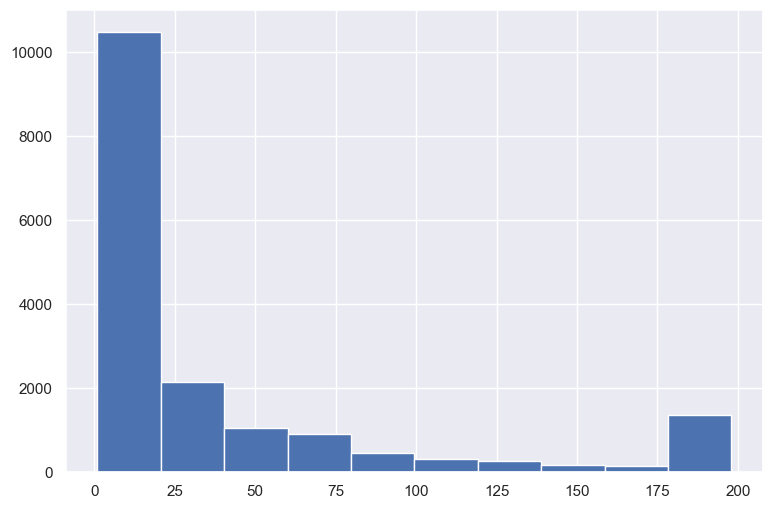

In [54]:
events_passed.passed_step.hist()

In [53]:
events_passed.sort_values(['passed_step'], ascending = False)

,user_id,passed_step
8631,13365,198
16510,25632,198
2995,4546,198
13758,21395,198
10641,16489,198
...,...,...
12116,18806,1
12114,18802,1
12108,18795,1
4395,6733,1


Что мы видим? 

что в нашем аггрегированном датасэте есть значение числа СДАННЫХ (решенных) степов равное 1

это значит, что мы ПОТЕРЯЛИ всех пользователей, которые НЕ РЕШИЛИ НИ ОДНОГО степа.

### вывод: решение неверное.

Что делаем дальше?

воспользуемся ***pivot таблицами***

что она сделает: она перепишет таблицу таким образом, что :
1) нужные нам данные из колонки юзеров станут индексами
2) именами колонок станут названия колонки action (увидел, решил, впервые открыл, первая попытка решения)
3) значениями в колонках станет посчет количества каждого из действий для каждого из юзеров
4) а те позиции, которые окажутся пустыми - заполнит нулями

In [58]:
# включаем 0 в выборку
events_data.pivot_table(index='user_id', 
                        columns='action',                   # здесь назначили имена колонок
                        values='step_id',                   # здесь сообщили откуда взять значения для заполнения
                        aggfunc='count',                    # здесь сказали что делать с этими значениями
                        fill_value=0)\
                            .reset_index().head()           # здесь "сбросили" индексы, заведя их в отдельную колонку 


# для наглядности уберу сброс индексов, чтобы увидеть как таблица выглядит на выходе

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [59]:
# для наглядности уберу сброс индексов, чтобы увидеть как таблица выглядит на выходе

events_data.pivot_table(index='user_id', 
                        columns='action',                   # здесь назначили имена колонок
                        values='step_id',                   # здесь сообщили откуда взять значения для заполнения
                        aggfunc='count',                    # здесь сказали что делать с этими значениями
                        fill_value=0)\
                            .head() 

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
